<a href="https://www.kaggle.com/code/egyfirst/denmune-clustering-iris-dataset?scriptVersionId=127741511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 41 kB 418 kB/s             
     |████████████████████████████████| 9.2 MB 16.7 MB/s            


In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 6.14 MiB/s, done.


Plotting dataset Groundtruth


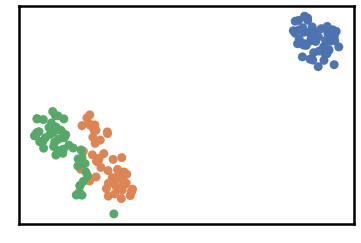

Plotting train data


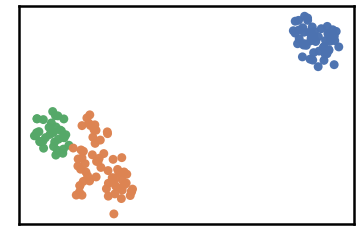

Validating train data
├── exec_time
│   ├── DenMune: 0.022
│   ├── NGT: 0.003
│   └── t_SNE: 0.826
├── n_clusters
│   ├── actual: 3
│   └── detected: 3
├── n_points
│   ├── dim: 4
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── plot_size: 150
│   ├── size: 150
│   ├── strong: 86
│   └── weak
│       ├── all: 64
│       ├── failed to merge: 0
│       └── succeeded to merge: 64
└── validity
    └── train
        ├── ACC: 135
        ├── AMI: 0.795
        ├── ARI: 0.746
        ├── F1: 0.898
        ├── NMI: 0.798
        ├── completeness: 0.809
        └── homogeneity: 0.787



In [4]:
data_path = 'datasets/denmune/uci/' 
dataset='iris' 
data_file = data_path + dataset + '.csv'

X_train = pd.read_csv(data_file, sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1)  

knn = 11 # k-nearest neighbor, the only parameter required by the algorithm
dm = DenMune(train_data=X_train,
             train_truth=y_train,
             k_nearest=knn,
             rgn_tsne=False)

labels, validity = dm.fit_predict(show_noise=True, show_analyzer=True)
